# From unstructured text to visualization
## Political science course

In this notebook, we will explore different ways of visualizing unstructured text data. This first notebook will introduce different concepts required for working effectively with text.

To get started, we will load some prepared sample data. Change the group variable to your assigned group, then execute the cell to load the data.

In [67]:
import pandas as pd

# Change the value of this variable
group = 5

url = "https://raw.githubusercontent.com/daalft/polviz/main/data/{}.tsv"
group_map = {1: "like_dempa", 2: "dis_dempa", 3: "like_repa", 4: "dis_repa", 5: "like_dempc"}
group_url = url.format(group_map[group])
# Read the TSV file
df = pd.read_csv(group_url, sep='\t')
data = [str(x) for x in df[df.columns[1]].tolist()]

Next, we will split the data into words using simple white-space tokenization.

In [68]:
words = " ".join(data).split(" ")

Next, we will create a counter over all words.

In [69]:
from collections import Counter
counts = Counter(words)

This allows us to easily see the most frequent words. Execute the next cell to see the most frequent $n$ words.

In [70]:
n = 10
counts.most_common(n)

[('and', 1789),
 ('the', 1712),
 ('', 1506),
 ('a', 1307),
 ('she', 1298),
 ('to', 1242),
 ('is', 1229),
 ('I', 983),
 ('of', 888),
 ('She', 824)]

## Stopword filtering
As you can see from the above output, we get many words we may not be interested in, such as _the_, _to_, and _and_. These words are commonly referred to as stopwords (i.e., words that have little value for most tasks; **N.B.**: There are cases where stopwords are informative, for example in author profiling). Let's filter out these words.

In [71]:
import nltk
from nltk.corpus import stopwords
# Download the necessary resource, only required the first time
nltk.download('stopwords')
# Load the set of English stopwords
stop_words = set(stopwords.words('english'))
# Filter out words that are stopwords
words2 = [x for x in words if x and x.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now, let's see how our counts look without stopwords.

In [72]:
counts2 = Counter(words2)
n = 10
counts2.most_common(n)

[('like', 311),
 ('Donald', 253),
 ('think', 245),
 ('Trump', 241),
 ('good', 212),
 ('people', 206),
 ('woman', 188),
 ('rights', 176),
 ('Trump.', 155),
 ('seems', 154)]

Let's visualize these results. First, we will show the $n$ most frequent words using a horizontal bar chart, and then a word cloud.

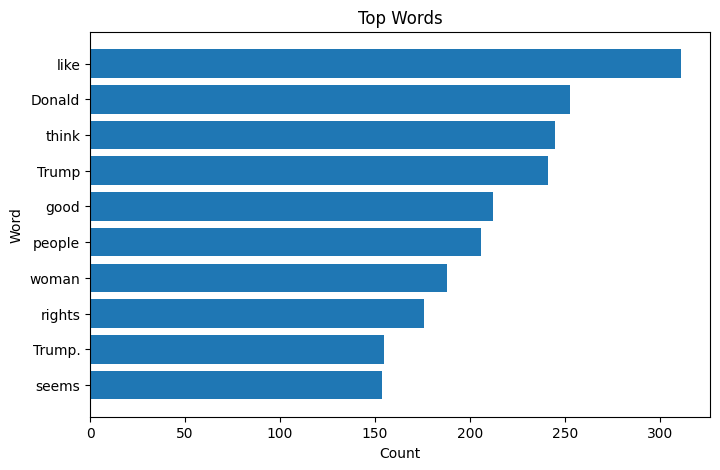

In [73]:
import matplotlib.pyplot as plt

viz_counts = counts2.most_common(n)
words, counts = zip(*viz_counts)

plt.figure(figsize=(8,5))
plt.barh(words, counts)
plt.gca().invert_yaxis()  # highest count on top
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top Words")
plt.show()

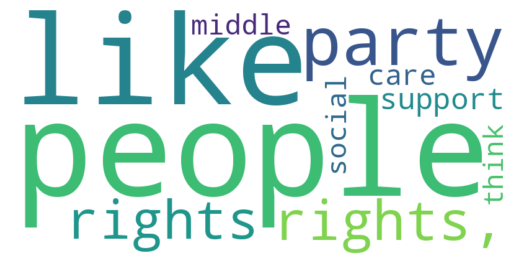

In [21]:
from wordcloud import WordCloud

word_freq = dict(viz_counts)

wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(word_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

For the purpose of this course, the data was parsed using [stanza](https://stanfordnlp.github.io/stanza/index.html), with the following modules: Part-of-Speech tagging, Lemmatization, Named Entity Recognition, Sentiment Analysis. Due to the lengthy calculation, the data is provided in already annotated form.

In [46]:
import os
import re
import requests
stanza_url = os.path.splitext(group_url)[0] + "_stanza.json"
response = requests.get(stanza_url)
stanza_data = response.json()

In [47]:
sentences = []
for item in stanza_data:
    if isinstance(item, dict):
        sentences.append(item)
    elif isinstance(item, list):
        sentences.extend([x for x in item if isinstance(x, dict)])

In [50]:
lemmas_list = [[t.get("lemma") for t in s.get("tokens", []) if t.get("lemma")] for s in sentences]
flat_lemmas = [lemma for sublist in lemmas_list for lemma in sublist if lemma and not lemma in stop_words and re.match(r"\w+", lemma)]

In [51]:
lemma_counts = Counter(flat_lemmas)

In [66]:
n = 10
lemma_counts.most_common(n)

[('I', 987),
 ('person', 743),
 ('right', 737),
 ('like', 424),
 ('policy', 391),
 ('support', 342),
 ('party', 336),
 ('good', 315),
 ('woman', 311),
 ('ae', 304)]

Next, we will visualize sentiment (polarity) in our dataset.

In [60]:
sentiments = [s.get("sentiment") for s in sentences]

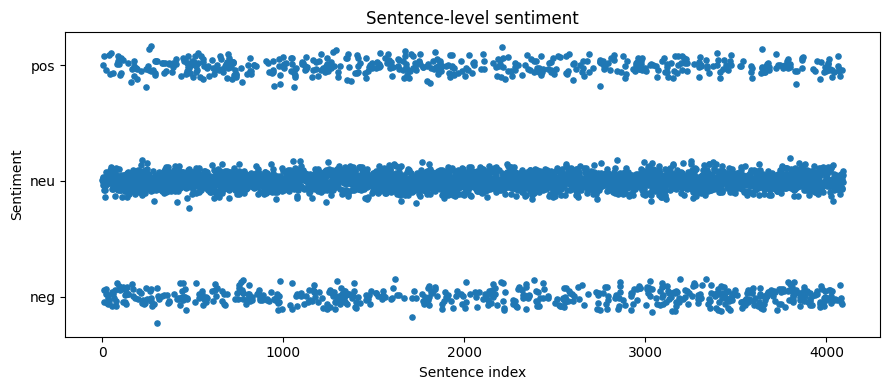

In [63]:
import numpy as np
# df has columns: sentence_index, sentiment (0/1/2), text
y = sentiments
x = np.arange(len(y))

# add small vertical jitter so overlapping integers are visible
rng = np.random.default_rng(0)
y_jitter = y + rng.normal(0, 0.06, size=len(y))

plt.figure(figsize=(9,4))
plt.scatter(x, y_jitter, s=14)
plt.yticks([0,1,2], ["neg","neu","pos"])
plt.xlabel("Sentence index")
plt.ylabel("Sentiment")
plt.title("Sentence-level sentiment")
plt.tight_layout()
plt.show()